# Classification on Iris Dataset with Artificial Neural Networks

### Import Classes and Functions

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import  Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import matplotlib.pyplot as plt
import itertools
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

###  Initialize Random Number Generator

In [10]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


### Load the dataset

In [11]:
# load dataset
dataframe = pd.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]


### Data Exploration
1) Outputs summary of data like mean,std, max.. Means are in the same order of magnitude for all features so scaling might not be beneficial.If mean values were of different orders of magnitude, scaling could significantly improve accuracy of a classifier.
`dataframe.describe()`

2) Outputs first 5 values in dataset
`dataframe.head()`

3) Dataframe.info gives basic information on data integrity (data types and detection of NaN values)
`dataframe.info()`

4) Inorder to see the number or rows and columns in the dataset(this data has 150 rows,5columns) 
`print(dataframe.shape`

5) To see the column names
`print(list(dataframe.columns))`

6) For categorical attributes, you can see the attribute values by doing
`dataframe['attribute_name'].unique()`

### More Methods
1) The number of each class for output values can be seen by using 
`dataframe['y]'.value_counts()`

2) A histogram can be drawn to see the distribution of the data
```python
 sns.countplot(x='y',data=dataframe,palette='hls')
 plt.show()
 plt.savefig('count_plot')
 ```
3)Check missing values in train data
`train_df.isnull().sum()`  

4) If attribute age for example is missing, Percent of missing "Age" 

`print('Percent of missing "Age" records is %.2f%%' %((train_df['Age'].isnull().sum()/train_df.shape[0])*100))`

## Data Integrity
### Handling Missing Values
Follow [this link](https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python) to see how missing values were handled with Titanic dataset

### Checking for zero values and replacing by mean
```python
# Display how many 0 value each feature have
for field in diabetes.columns[:8]:
    print('Number of 0-entries for "{field_name}" feature: {amount}'.format(
        field_name=field,
        amount=np.count_nonzero(diabetes[field] == 0)
    ))
```
Replace with mean
```python
# features_with_zeros = diabetes.columns[1:-1]
    
# diabetes[features_with_zeros] = diabetes[features_with_zeros].replace(0, np.nan)
# diabetes[features_with_zeros] = diabetes[features_with_zeros].fillna(diabetes.mean())
```

### Encode Output

In [12]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

#### Feature Scaling

In [25]:
#Feature Scaling
# sc = StandardScaler()
# X = sc.fit_transform(X)

### Define the neural network model

In [39]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(4, input_dim=4, activation='relu'))
    # Adding dropout to prevent overfitting
    model.add(Dropout(rate = 0.1))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Creating our KerasClassifier for use in scikit-learn
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

### Performing k-fold cross validation

In [40]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

### Evaluating the model with k-fold cross validation

In [41]:
#Evaluating out estimator on our dataset using 10-fold cross valiation
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 95.33% (5.21%)


### Getting the confusion matrix

In [8]:
#Get our result predictions 
y_pred = cross_val_predict(estimator, X, Y, cv=kfold)
#Get our confusion matrix
conf_mat = confusion_matrix(Y, y_pred)
class_report = classification_report(Y,y_pred)
print(conf_mat)
print(class_report)

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

    avg / total       0.97      0.97      0.97       150



### Transforming to a plot

In [9]:
#Getting Accuracy, Specificity and Sensitivity from the confusion matrix
total1=sum(sum(conf_mat))
#Accuracy
accuracy=((conf_mat[0,0]+conf_mat[1,1]+conf_mat[2,2])/total1)*100
precision = np.diag(conf_mat) / np.sum(conf_mat, axis = 0)
#Sensitivity
sensitivity = np.diag(conf_mat) / np.sum(conf_mat, axis = 1)
#Specificity
#specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])

specificity1 = (conf_mat[1,1] + conf_mat[1,2] + conf_mat[2,1] + conf_mat[2,2]) / (conf_mat[0,1]+conf_mat[0,2]+conf_mat[1,1] + conf_mat[1,2] + conf_mat[2,1] + conf_mat[2,2])

specificity2 = (conf_mat[0,0] + conf_mat[0,2] + conf_mat[2,1] + conf_mat[2,2]) / (conf_mat[1,0]+conf_mat[1,2]+conf_mat[0,0] + conf_mat[0,2] + conf_mat[2,1] + conf_mat[2,2])

specificity3 = (conf_mat[0,0] + conf_mat[0,1] + conf_mat[1,0] + conf_mat[1,1]) / (conf_mat[2,0]+conf_mat[2,1]+conf_mat[0,0] + conf_mat[0,1] + conf_mat[1,0] + conf_mat[1,1])


print(accuracy)
print(sensitivity)
print("[{} {} {}]".format(round(specificity1, 2), round(specificity2, 2),round(specificity3, 2)))

97.33333333333334
[1.   0.94 0.98]
[1.0 0.97 0.99]


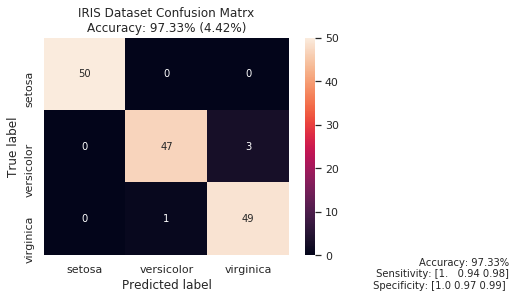

In [10]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(conf_mat,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('IRIS Dataset Confusion Matrx\nAccuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.figtext(1.30, 0.01, 'Accuracy: {}%\n Sensitivity: {}\n Specificity: [{} {} {}] '.format(round(accuracy, 2),sensitivity,round(specificity1, 2), round(specificity2, 2),round(specificity3, 2)), horizontalalignment='right')
plt.show()